In [38]:
import pickle
import pandas as pd

path = '/content/annotation_training.pkl'

with open(path, 'rb') as file:
    OCEAN = pickle.load(file, encoding="latin")


df_OCEAN = pd.DataFrame(OCEAN).reset_index()
df_OCEAN.head(5)

,index,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,J4GQm9j0JZ0.003.mp4,0.523364,0.552083,0.626374,0.601942,0.504673,0.488889
1,zEyRyTnIw5I.005.mp4,0.345794,0.375000,0.472527,0.582524,0.457944,0.366667
2,nskJh7v6v1U.004.mp4,0.252336,0.291667,0.406593,0.485437,0.373832,0.511111
3,6wHQsN5g2RM.000.mp4,0.457944,0.489583,0.505495,0.398058,0.457944,0.377778
4,dQOeQYWIgm8.000.mp4,0.607477,0.489583,0.406593,0.621359,0.570093,0.622222


In [39]:
df_OCEAN.shape

(6000, 7)

In [40]:
data = df_OCEAN

In [41]:
y = data['interview']

In [42]:
x = data
x = x.drop(columns = ['interview', 'index'])

In [43]:
x.head(3)

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,0.523364,0.552083,0.626374,0.601942,0.488889
1,0.345794,0.375000,0.472527,0.582524,0.366667
2,0.252336,0.291667,0.406593,0.485437,0.511111


In [44]:
def ocean_to_mbti(ocean_scores):
    # Извлекаем черты из словаря с оценками OCEAN
    extraversion = ocean_scores['Extraversion']
    openness = ocean_scores['Openness']
    agreeableness = ocean_scores['Agreeableness']
    conscientiousness = ocean_scores['Conscientiousness']

    # Определяем каждую из четырех букв MBTI
    mbti_type = ''
    mbti_type += 'E' if extraversion > 0.5 else 'I'
    mbti_type += 'N' if openness > 0.5 else 'S'
    mbti_type += 'F' if agreeableness > 0.5 else 'T'
    mbti_type += 'J' if conscientiousness > 0.5 else 'P'

    return mbti_type

# Пример значений OCEAN
ocean_scores = {
    'Extraversion': 0.7,
    'Openness': 0.6,
    'Agreeableness': 0.4,
    'Conscientiousness': 0.8
}

print(ocean_to_mbti(ocean_scores))  # Вывод: "ENTJ"

ENTJ


In [45]:
path = '/content/annotation_validation.pkl'

with open(path, 'rb') as file:
    OCEAN = pickle.load(file, encoding="latin")


df_OCEAN = pd.DataFrame(OCEAN).reset_index()
df_OCEAN.head(5)

,index,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
0,modNfUPt3F4.002.mp4,0.644860,0.593750,0.615385,0.640777,0.616822,0.555556
1,h6LOjpCRXtY.005.mp4,0.439252,0.520833,0.417582,0.572816,0.439252,0.411111
2,WER4ww680QQ.004.mp4,0.457944,0.312500,0.428571,0.398058,0.373832,0.555556
3,c4XnKouozXU.002.mp4,0.364486,0.572917,0.527473,0.553398,0.523364,0.322222
4,OEKg-Tvwcbk.002.mp4,0.345794,0.468750,0.516484,0.417476,0.383178,0.477778


In [46]:
df_OCEAN.shape

(2000, 7)

In [47]:
test_x = df_OCEAN
test_x = test_x.drop(columns = ['index', 'interview'])
test_x.head(5)

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,0.644860,0.593750,0.615385,0.640777,0.555556
1,0.439252,0.520833,0.417582,0.572816,0.411111
2,0.457944,0.312500,0.428571,0.398058,0.555556
3,0.364486,0.572917,0.527473,0.553398,0.322222
4,0.345794,0.468750,0.516484,0.417476,0.477778


In [48]:
test_y = df_OCEAN['interview']

In [49]:
!pip install catboost

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Пример данных         # Непрерывное целевое значение

# Список моделей для регрессии
model = RandomForestRegressor()

model.fit(x, y)
y_pred = model.predict(test_x)
mae = mean_absolute_error(test_y, y_pred)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f"MAE: {mae:.5f}, RMSE: {rmse:.5f}")


MAE: 0.03643, RMSE: 0.04620


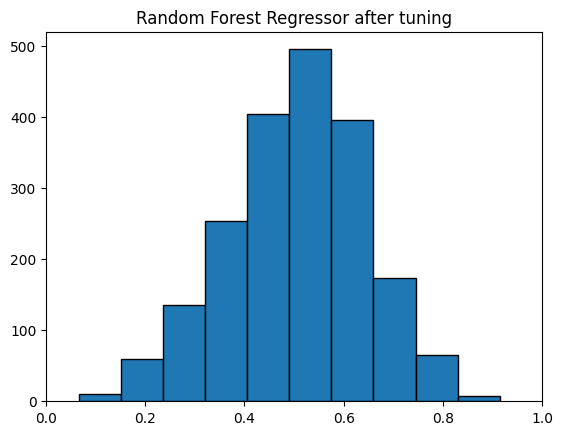

In [51]:
import matplotlib.pyplot as plt
plt.hist(y_pred, edgecolor='black')
plt.title('Random Forest Regressor after tuning')
plt.xlim(0, 1)
plt.show()

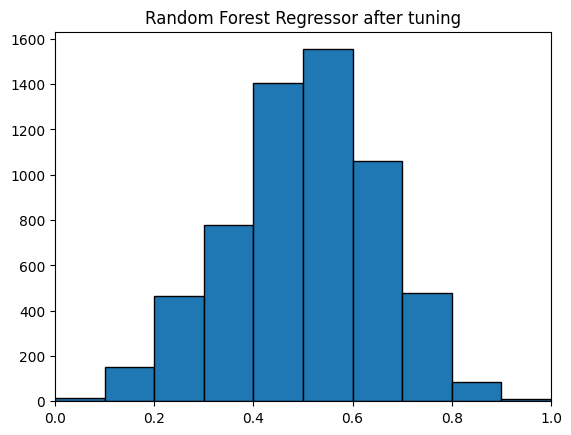

In [53]:
plt.hist(y, edgecolor='black')
plt.title('Random Forest Regressor after tuning')
plt.xlim(0, 1)
plt.show()

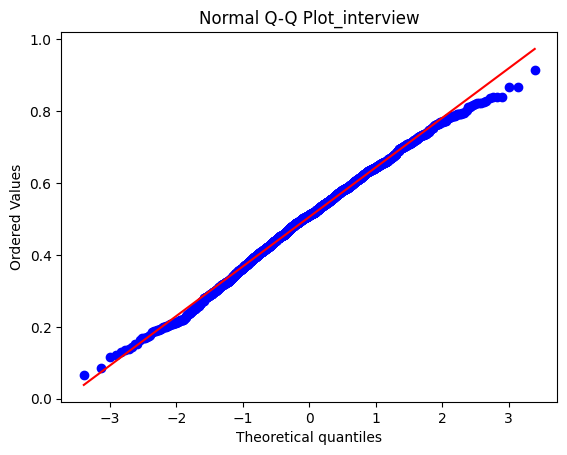

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

probplot(y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot_interview")
plt.show()
